In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [45]:
con = sqlite3.connect('/Users/weatherford/Documents/Flatiron/Trystan_Jalil_phase1_project/Trystan_Work/zippedData/im.db')
cursor_obj = con.cursor()

imdb = pd.read_sql("""
SELECT *
FROM movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id;
""", con)


imdb

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


In [46]:
imdb = imdb.set_axis(['movie_id', 'averagerating', 'numvotes', 'movie_id_2', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres'], axis=1)

In [47]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   movie_id_2       73856 non-null  object 
 4   primary_title    73856 non-null  object 
 5   original_title   73856 non-null  object 
 6   start_year       73856 non-null  int64  
 7   runtime_minutes  66236 non-null  float64
 8   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [48]:
imdb.drop('movie_id_2', inplace=True, axis=1)

In [49]:
imdb.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [50]:
imdb.sort_values(by=['runtime_minutes'], ascending = False)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
44210,tt8273150,5.0,17,Logistics,Logistics,2012,51420.0,Documentary
12828,tt2659636,6.2,69,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary
34936,tt2008009,8.9,219,The Clock,The Clock,2010,1440.0,Drama
62024,tt8677246,8.6,5,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History"
39290,tt9047474,8.5,100,La flor,La flor,2018,808.0,"Drama,Fantasy,Musical"
...,...,...,...,...,...,...,...,...
73843,tt9657910,5.0,7,Trilece,Trilece,2018,NaN,History
73844,tt9668598,5.5,317,Musabbar,Musabbar,2019,NaN,"Horror,Thriller"
73848,tt9722952,7.0,6,O Is Bende,O Is Bende,2019,NaN,Comedy
73850,tt9783738,7.4,7,Bangkok Dark Tales,Bangkok Dark Tales,2019,NaN,Horror


In [40]:
imdb = imdb.drop(index=44210)

KeyError: '[44210] not found in axis'

In [41]:
imdb

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [51]:
subset_imdb = imdb[['averagerating', 'runtime_minutes', 'numvotes', 'genres']].sample(500)

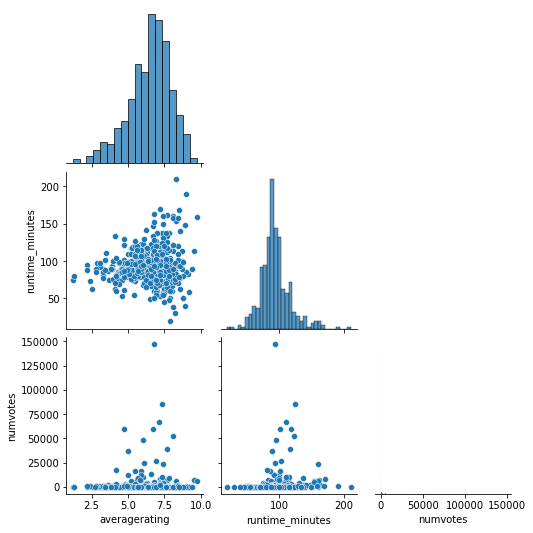

In [52]:
import seaborn as sns
sns.pairplot(data = subset_imdb, corner = True)